# INFO 2950 Phase IV

Team: 
Carter Zhu (yz553)
Jase Rivera (jcr297)
Matthew Mentis-Cort (mam692)


## Table of Contents

1. [Research Questions](#Research-Questions)
2. [Introduction](#Introduction)
3. [Data Description](#Research-Questions)
4. [Preregistration Statement](#Preregistration-Statement)
5. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
6. [Data Analysis](#Data-Analysis)
    - [Imports](#Imports)
    - [Data Exploration and Visualizations](#Data-Exploration-and-Visualizations)
    - [Models and Hypothesis Testing](#Models-and-Hypothesis-Testing)
        - [GDP Growth Trends](#GDP-Growth-Trends)
        - [Unemployment Trends](#Unemployment-Trends)
        - [Significance Testing](#Significance-Testing)
7. [Conclusion / Interpretation](#Conclusion-/-Interpretation)
8. [Data Limitations](#Data-Limitations)
9. [Resources](#Resources)

## Research Questions

How does government expenditure on education influence long-term changes in GDP growth rates (as a measure of economic growth) and unemployment rates in developing (low-income and lower-middle-income) versus developed (upper-middle-income and high-income) countries?

## Introduction

This EDA uses data from the World Bank Group to explore economic trends across different countries from 1965 to 2023. The dataset includes key factors such as unemployment rates, GDP growth, and government expenditure on education. The goal of this analysis is to discover patterns and relationships that emphasize economic performance in the world.

In this EDA, our goal is to identify key patterns and trends related to global economic inequality and development. The analysis will show which countries have reduced unemployment and increased GDP growth, as well as if investments in education correspond to these outcomes.


## Data Description

**What are the observations (rows) and the attributes (columns)?**

Observations (Rows): Each row in the dataset corresponds to a country and a specific economic indicator (e.g., GDP growth, government expenditure on education, or unemployment) for mulitple years(1965-2023). The rows are structured with country-level data, showing trends and changes in economic indicators over time.

Attributes (Columns):
Country Name: The name of the country.
Country Code: A unique identifier for each country (ISO or similar).
Series Name: The economic indicator (e.g., GDP growth, unemployment, government expenditure on education).
Year Columns: Yearly data points from 1965 to 2023, where each column represents the recorded value of the economic indicator for that specific year.

**Why was this dataset created?**

The dataset was created to track economic performance and trends in different countries over time. The data helps governments, policymakers, economists, and international organizations understand key economic metrics such as GDP growth, government expenditure on education, and unemployment rates, which can guide economic development strategies and interventions in different regions of the world. 

**Who funded the creation of the dataset?**

The dataset was funded and crafted by The World Bank, a global financial institution that supports development efforts in countries world-wide. Its mission is to reduce poverty and promote sustainable development so the World Bank regularly collects and publishes data on a wide range of economic indicators to aid in policy-making and development planning.

**What processes might have influenced what data was observed and recorded and what was not?**

Data availability and reliability: Some countries may not have consistent or complete data records due to political instability, inadequate infrastructure, or limited data collection capabilities. This can lead to missing or incomplete data for certain years.

Selection of indicators: The choice of economic indicators included in the dataset (e.g., GDP growth, unemployment, government expenditure) reflects the focus areas of development agencies and governments. I believe these indicators chosen are deemed critical and essential for assessing economic health.

Reporting standards: Differences in national reporting standards and data collection methods could lead to variations in data quality and coverage.

Bias in data recording: Some data points may reflect self-reported figures from governments, which could be subject to political influence or reporting biases, particularly in countries where transparency or accurate reporting is less enforced.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The original data consisted of four datasets grouped by income level of the countries(low_income, lower_middle, upper_middle, high_income) to distinguish between developing and developed countries. Preprocessing was done to standardize economic indicators and ensure consistency across countries and years.

First, only the relevant economic indicators—GDP growth, government expenditure on education, and unemployment—were retained. Rows missing essential information like Country Name, Country Code, or Series Name were removed. Year columns from 1960 to 1964 were excluded due to data quality issue, and non-numeric values like ".." were replaced with NaN.

To handle missing values,linear interpolation was used to estimate missing data based on adjacent trends. Remaining NaN rows were dropped as there was too many missing data for linear interpolation to work well, and a new column, country_type, was added to label each country based on its income group. Finally, all datasets were merged into a single dataset for analysis.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Data collection for this type of dataset is typically done through government reporting mechanisms and international data collection efforts, not directly involving individuals. Governments or institutions contributing data likely understood that the information would be used for development assessments, economic planning, and research purposes. However, the individuals whose economic data are aggregated (e.g., unemployment figures) may not be aware of the specific data collection.


**Where can your raw source data be found, if applicable? Provide a link to the raw data.**

The four original dataset that we merged along with the final_dataset is in the google drive. we have also uploaded it to github.

https://drive.google.com/drive/folders/1Ka6LAx-YR8TA3QkG9799JndAbxd8Jlio?usp=sharing
https://databank.worldbank.org/source/world-development-indicators#


## Preregistration Statement 


Provide at least 2 preregistration statements. Each
statement contains a hypothesis and a description of analysis to study the
hypothesis. It should also include context for why you believe in your hypothesis

by referencing domain knowledge or other literature. Refer to Phase 3 rubric for
more details.

## Data Cleaning and Preprocessing

The data cleaning process involved multiple structured steps to ensure consistency, completeness, and proper formatting of the data for analysis. To address the research question, "How does government expenditure on education impact long-term economic growth and unemployment in developing versus developed countries?", the dataset was filtered to focus on three key variables. GDP growth (annual %) was selected as it serves as a fundamental measure of economic growth, reflecting the annual percentage increase in a country's economic output and providing insight into the broader economic impact of government policies. Government expenditure on education (total % of GDP) was included as it directly measures a country's investment in education relative to its economic output, capturing the priority placed on educational funding. Unemployment (total % of labor force, modeled ILO estimate) was chosen to assess labor market outcomes, particularly the effectiveness of economic and educational policies in addressing employment challenges.

Rows missing essential identifying information, such as Country Name, Country Code, or Series Name, were removed to maintain data integrity. Columns corresponding to the years 1960 to 1964 were excluded because they contained too many missing values to be useful. Non-numeric placeholders, such as .., were replaced with NaN to enable numeric operations, and the year columns were converted to a numeric format for consistency.

Linear interpolation was applied to estimate missing values based on trends in adjacent data points. This method was chosen because it preserves the temporal continuity of the dataset, ensures smooth transitions between known values, and minimizes the bias that other methods, such as mean imputation, could introduce. After interpolation, any remaining rows with NaN values were dropped to create a fully complete dataset. To enable comparison across countries, a new column, country_type, was added, categorizing countries based on their income classification (e.g., low_income, lower_middle, upper_middle, and high_income). Finally, the individual datasets were merged into a single, unified dataset. This thorough process ensured that the dataset was prepared for meaningful analysis, addressing gaps and inconsistencies while maintaining the integrity of the trends across key variables.


## Data Analysis

### Imports

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Visualizations

We built a summary table to show statistics for each of our variables of interest, GDP growth, government expenditure, and unemployment. This gives us an idea of how many points we have in the dataset, and some of the extremes and summary statistics for each of our variables. The maxes for each variable are particularly interesting because it shows us that we have poential outliers to account for in the future (e.g. max unemployment percent of $82\%$).

The data shows significant variability in global economic indicators:

GDP growth averages 3.88%, with large fluctuations (std: 6.74)
Government expenditure on education averages 4.7% of GDP
Unemployment rate averages 6.04%, with wide variability (std: 6.26)

In [2]:
data=  pd.read_csv('final_cleaned_data.csv')

#specific economic indicators 
key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

#all the years we are analyzing 
years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]


#reshape data so year becomes rows instead of columns
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'], \
value_vars=years_columns, var_name='Year', value_name='Value')

summary_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]

summary_data_pivot = summary_data.pivot_table(index=\
                ['Country Name', 'Year', 'country_type'], \
                                        
                 columns='Series Name', values='Value').dropna()

summary_statistics = summary_data_pivot.describe()
#summary_data_pivot.head()
summary_statistics

Series Name,GDP growth (annual %),"Government expenditure on education, total (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,12331.000000,12331.000000,12331.000000
mean,3.888494,4.698497,6.042230
std,6.744425,5.162471,6.255983
min,-64.047107,-51.030865,-51.030865
25%,1.429953,2.677334,2.789146
50%,3.896714,4.431070,4.977000
75%,6.366926,6.275724,8.317796
max,153.492641,86.543820,81.887797


Because we are interested in the trends for each income group, we made some lineplots showing how GDP Growth, government expendiure, and unemployment change over time. Making these charts allows us to see commonalities between variables in various time periods. We can compare the trends of the lines between plots for different variables to see which ones have similar trends over time.

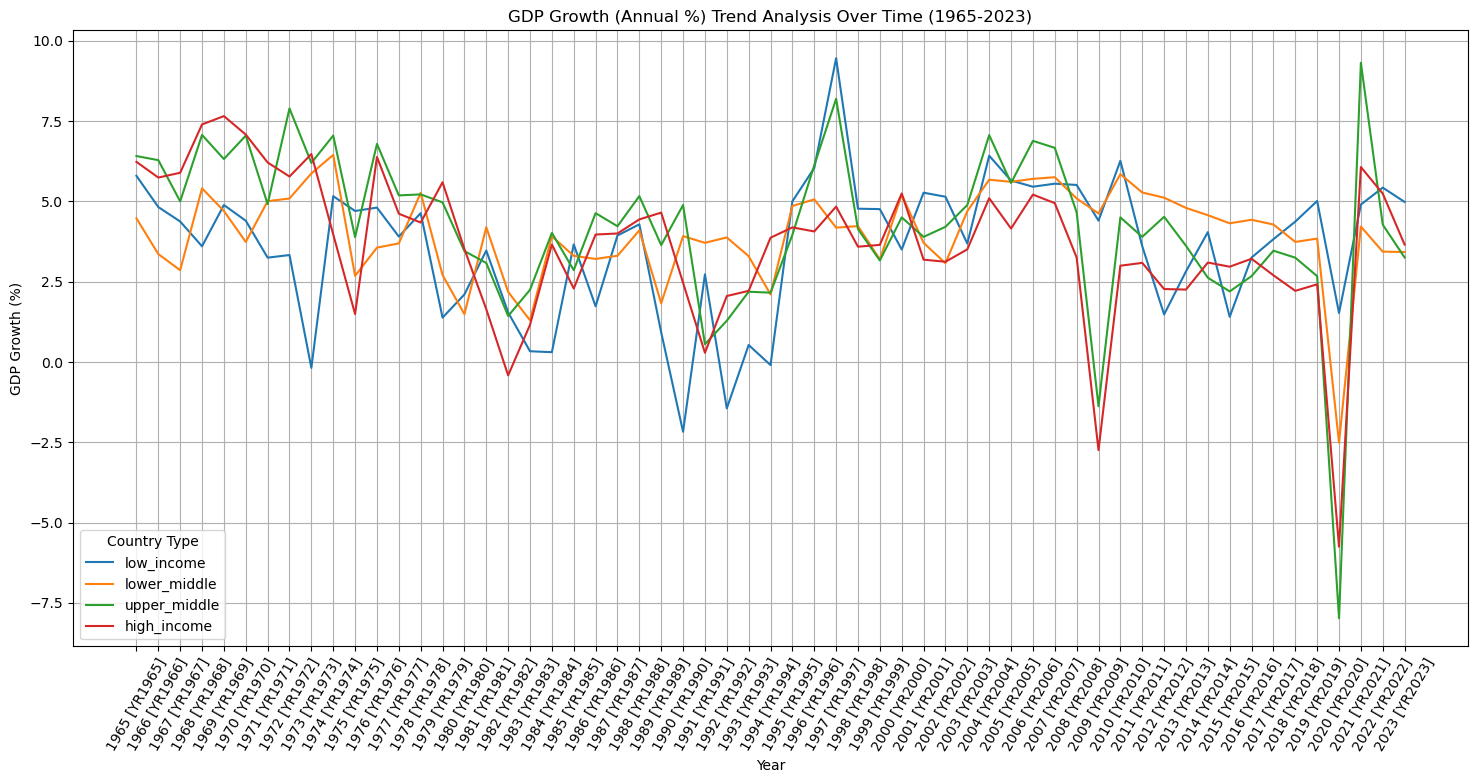

In [3]:
#GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)

key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'],\
 value_vars=years_columns, var_name='Year', value_name='Value')

gdp_data = time_data_full[time_data_full['Series Name'] == "GDP growth (annual %)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=gdp_data, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)")
plt.ylabel("GDP Growth (%)")
plt.xlabel("Year")
plt.xticks(rotation =60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

The chart shows that while all countries experience cyclical economic growth, low-income countries are more vulnerable to economic instability and take longer to recover from economic downturns. In contrast, high-income and upper-middle-income countries tend to have more stable growth patterns, with faster recovery times from global emergencies. Major dips in 2008-2009 (financial crisis) and 2020 (COVID-19) affected all groups, but low-income nations were hit harder. Recently, there's a strong recovery across all country types, though the growth is not fully stabilized yet.


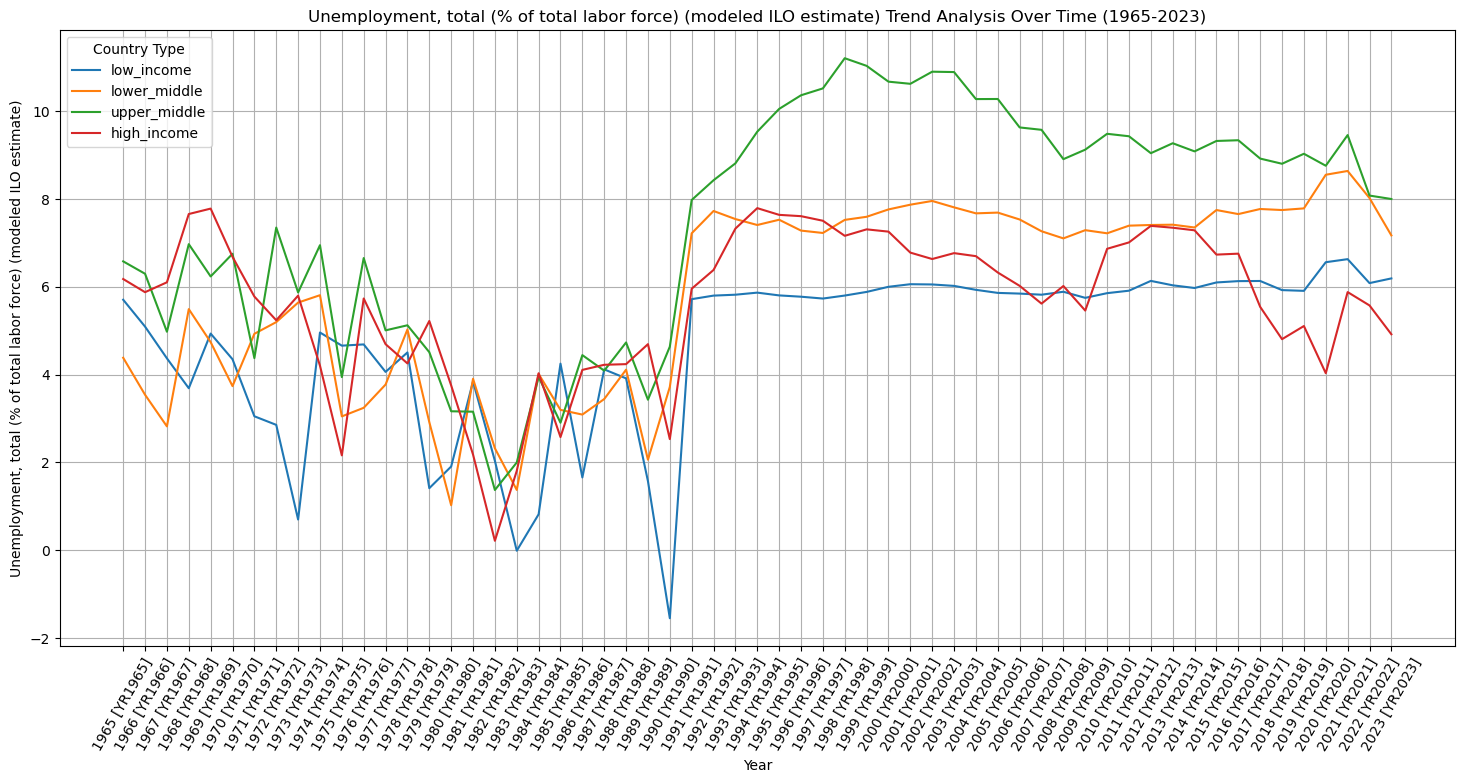

In [4]:
#Unemployment, total (% of total labor force) (modeled ILO estimate) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Unemployment, total (% of total labor force) (modeled ILO estimate)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Unemployment, total (% of total labor force) \
(modeled ILO estimate) Trend Analysis Over Time (1965-2023)")
plt.ylabel("Unemployment, total (% of total labor force) (modeled ILO estimate)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

This chart shows differences in how unemployment rates are across country income levels; upper-middle-income countries show continuous issues in the labor market. High-income countries recover more quickly after global recessions, while low-income countries exhibit more stability in unemployment rates, although it is possible that this could be due to data limitations or a high level of informal employment. Furthermore, high-income countries consistently having the lowest unemployment, while upper-middle-income countries experienced a significant spike around the 1990s but have since improved. The data also highlights the global impact of events like the 1980s recession, the 2008 financial crisis, and the 2020 pandemic.


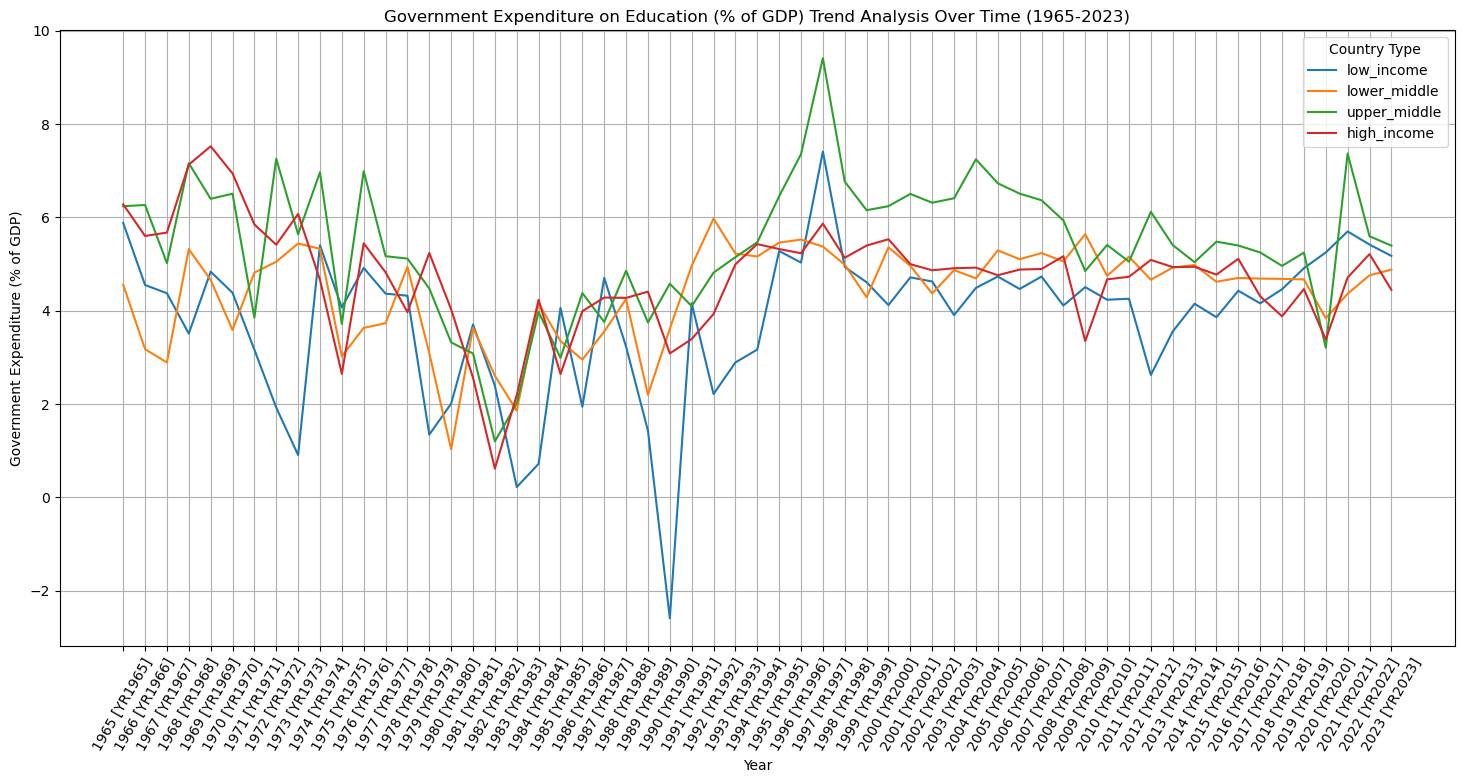

In [5]:
#Government Expenditure on Education (% of GDP) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Government expenditure on education, total (% of GDP)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value",\
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Government Expenditure on Education (% of GDP) \
Trend Analysis Over Time (1965-2023)")
plt.ylabel("Government Expenditure (% of GDP)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

Upper-middle-income countries consistently spend the **most on education**, especially after the 1990s. High- and lower-middle-income countries have **stable spending** between **4-6%** of GDP. Low-income countries show **more volatility** with sharp drops in the 1990s but recovery afterward.

We also want to observe the correlation between variables to examine which variables may have a relationship. From the correlation heat map below, we observe that GDP growth and government expenditure and government expenditure and unemployment have higher than 0.7 correlation coefficients, suggesting that they effect each other in a real life for the areas in our dataset.

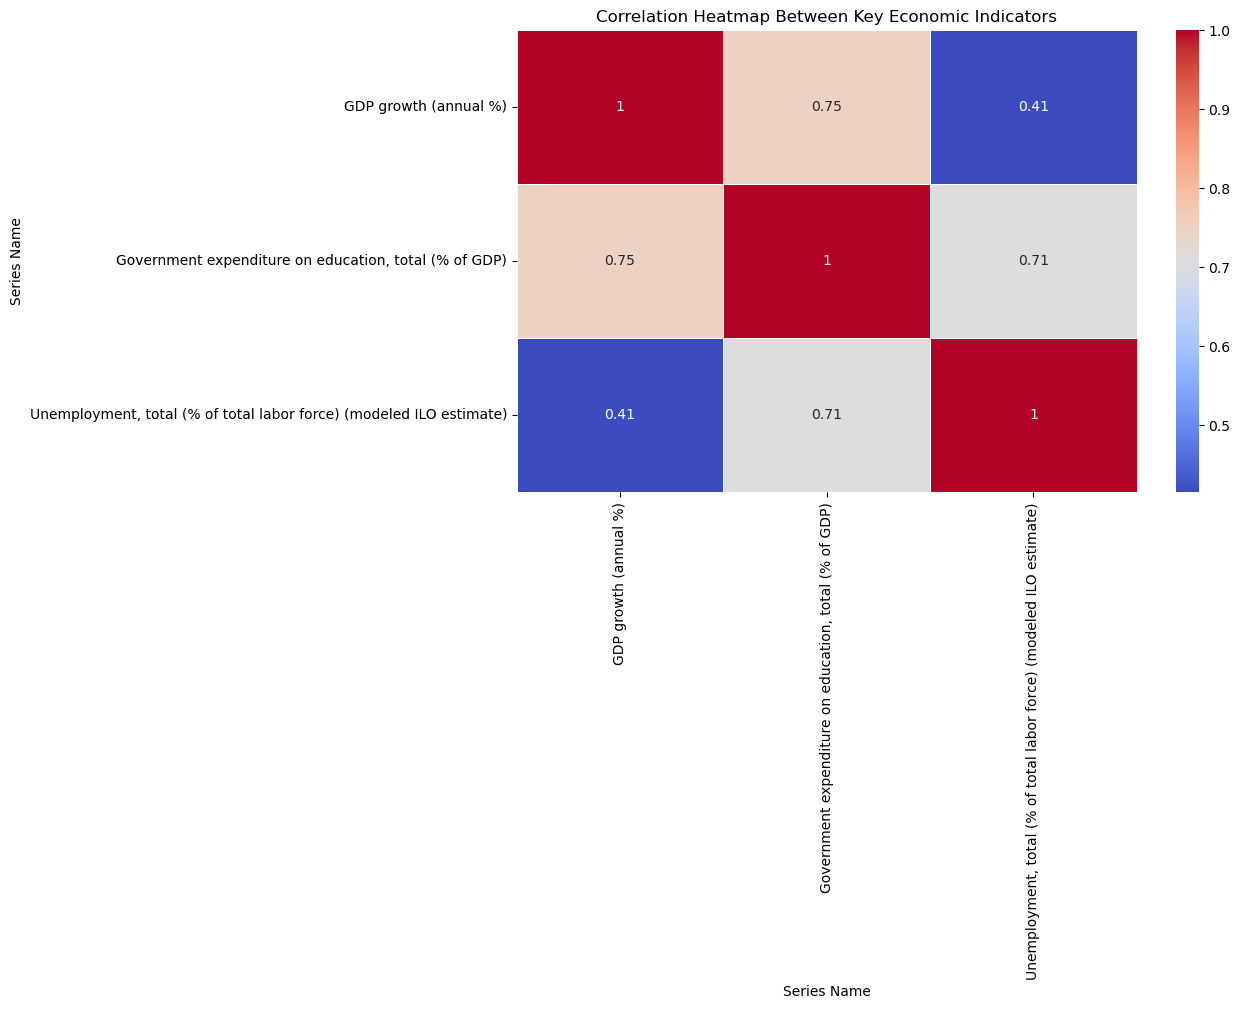

In [6]:
#Correlation Heatmap Between Key Economic Indicators

corr_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]
corr_data_pivot = corr_data.pivot_table(index=['Country Name',\
            'Year', 'country_type'], columns='Series Name', values='Value')
correlation_matrix = corr_data_pivot.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between Key Economic Indicators")
plt.show()


The heatmap shows strong positive correlations between GDP growth and education spending (0.75), and a strong negative correlation between education spending and unemployment (0.71). There’s also a moderate negative correlation between GDP growth and unemployment (0.41). This suggests a very interesting insight: higher education spending is linked to both higher growth and lower unemployment.

It reveals the relationships between economic growth, education investment, and labor market outcomes. While education spending correlates positively with both GDP growth and unemployment, the long-term benefits of the investments mae take more time to materialize, specifically in improving labor market conditions. Countries experiencing fast GDP growth may also face a temporary increase in unemployment becuase of shifts in labor demand, especially during periods of economic change or technological advancement.

### Models and Hypothesis Testing


In [7]:
# Reshape data to long format
years_columns = [col for col in data.columns if col.startswith("20") or col.startswith("196") or col.startswith("197") or col.startswith("198")]
data_long = data.melt(
    id_vars=["Country Name", "country_type", "Series Name"],
    value_vars=years_columns,
    var_name="Year",
    value_name="Value"
)

# Convert Year and Value to numeric, and filter for years starting from 1965
data_long["Year"] = pd.to_numeric(data_long["Year"].str.extract(r'(\d+)', expand=False))
data_long = data_long[data_long["Year"] >= 1965]
data_long["Value"] = pd.to_numeric(data_long["Value"], errors="coerce")

# GDP Growth Analysis
gdp_data = data_long[data_long["Series Name"] == "GDP growth (annual %)"]
developing_countries = gdp_data[gdp_data["country_type"].isin(["Low", "Lower middle"])]
developed_countries = gdp_data[gdp_data["country_type"].isin(["Upper middle", "High"])]

def run_regression(df, dependent, independent):
    X = sm.add_constant(df[independent].astype(float))
    y = df[dependent].astype(float)
    return sm.OLS(y, X).fit()

if not developing_countries.empty:
    developing_model = run_regression(developing_countries, "Value", "Year")
    print("Developing Countries GDP Regression:\n", developing_model.summary())

if not developed_countries.empty:
    developed_model = run_regression(developed_countries, "Value", "Year")
    print("\nDeveloped Countries GDP Regression:\n", developed_model.summary())



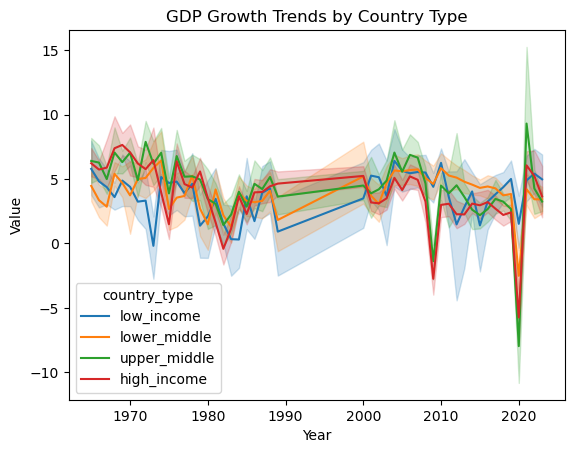

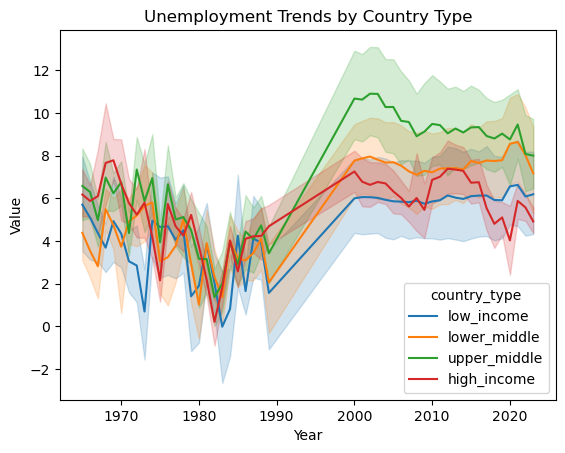

In [8]:
# Unemployment Analysis
unemployment_data = data_long[data_long["Series Name"] == "Unemployment, total (% of total labor force) (modeled ILO estimate)"].dropna()
unemployment_data["country_type_encoded"] = unemployment_data["country_type"].map({"Low": 0, "Lower middle": 0, "Upper middle": 1, "High": 1})
unemployment_data["interaction"] = unemployment_data["country_type_encoded"] * unemployment_data["Value"]

X = unemployment_data[["Value", "country_type_encoded", "interaction"]].astype(float).replace([float('inf'), float('-inf')], pd.NA).dropna()
y = unemployment_data["Value"].astype(float).loc[X.index]
X = sm.add_constant(X)

# Visualisations
sns.lineplot(data=gdp_data, x="Year", y="Value", hue="country_type")
plt.title("GDP Growth Trends by Country Type")
plt.show()

sns.lineplot(data=unemployment_data, x="Year", y="Value", hue="country_type")
plt.title("Unemployment Trends by Country Type")
plt.show()

#### GDP Growth Trends 

The analysis of GDP growth trends involves compares countries of different socioeconomic status from 1965 to 2023. The results indicate that all country types experienced similar GDP growth patterns, largely influenced by significant global events, such as the 2008 financial crisis and the COVID-19 pandemic in 2020. A significant finding here is a spike in GDP growth in 2021, specifically for upper-middle-income countries, which likely reflects economic recovery after the pandemic. The regression analysis showed that high-income and upper-middle-income countries tend to recover quicker from economic downturns, whereas developing countries face more significant challenges in achieving similar stability. This suggests that the economic stability in high-income regions is better equipped to handle global crisises.

#### Unemployment Trends

The unemployment trends from 1965 to 2023 show that upper-middle-income countries generally had higher unemployment rates after 1990, while high-income countries maintained relatively stable/lower unemployment rates. There is a noticeable increase in unemployment for upper-middle-income countries after 2000, which could suggest disruptions in the labor market or economic instability. In contrast, low-income countries show significant variability, reflecting the instability of their labor markets. Overall, the trends suggest that high-income countries are more consistent in handling unemployment.

#### Significance Testing

In [9]:
#Determine statistical significance of observed data.
#Interpret findings and conclude whether to reject or fail to reject hypotheses
#outlined in preregistration statements.

## Conclusion / Interpretation

Summarize your answers to your opening research questions.

## Data Limitations

* Missing Data: Some countries have incomplete data for certain years due to gaps in reporting, which may result in missing or estimated values that do not fully reflect actual conditions.
* Bias in Self-Reporting: Data from governments may be subject to reporting biases, especially in politically sensitive areas such as unemployment or economic growth. For example, some participants may not fill out the information accurately. 
* Limited Detail: The dataset contains national-level data, which may overlook regional disparities within countries.
* Interpolation: Filling in missing data using interpolation may introduce trends that do not accurately reflect economic realities.

## Resources

Dataset: https://databank.worldbank.org/source/world-development-indicators#
Data Manipulation Technique: https://www.geeksforgeeks.org/interpolation-in-python/

[Back to Top](#INFO-2950-Phase-IV)